<a href="https://colab.research.google.com/github/bmounikareddy98/Machine-learning-assignments/blob/main/Multiple_linear_Regression(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor


**The dataset is imported from github public repository**

In [214]:
url = 'https://raw.githubusercontent.com/gvp-yamini/ML/master/Assignment1/datasetfile.csv'
dataset = pd.read_csv(url)
dataset=dataset.dropna()
dataset = dataset.drop_duplicates()
print(dataset.head())

   holiday    temp  rain_1h  ...  weather_main  date_time  traffic_volume
0        0  289.10    55.63  ...             6          2             315
1        0  295.82    44.45  ...             6         11            4802
2        0  297.71    31.75  ...             6         17            4913
3        0  264.50    28.70  ...             6         23            1190
4        0  264.50    28.70  ...             8         23            1190

[5 rows x 8 columns]


**The dataset is divided into dependent variables array and an independent variable array.**

In [194]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X.shape)
print(Y.shape)
print(X[5])
#print(Y[5])



(47964, 7)
(47964,)
[  0.   292.02  27.57   0.    90.     6.     0.  ]


In [ ]:
Encode the categorical data

In [165]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 1]= labelencoder.fit_transform(X[:, 1])
X[:, 2]= labelencoder.fit_transform(X[:, 2])
print(X)

[[0 1 3 0 27.9 19]
 [1 0 2 1 33.77 18]
 [1 0 2 3 33.0 28]
 ...
 [0 0 2 0 36.85 18]
 [0 0 3 0 25.8 21]
 [0 1 1 0 29.07 61]]


In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


print(X[1])
#print(X.shape)



[0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1 33.77 18]


In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [196]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38371, 7)
(38371,)
(9593, 7)
(9593,)


In [217]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset=sc.fit_transform(dataset).toarray

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
"""X_train[:, 1:7] = sc.fit_transform(X_train[:, 1:7])
X_test[:, 1:7] = sc.transform(X_test[:, 1:7])
Y_train= sc.fit_transform(Y_train)
Y_test[:]= sc.fit_transform(Y_test[:])
print(X_train[0])
print(X_test[0])"""

AttributeError: ignored

**The null are checked in the dataset(there aren't any)**

In [156]:
print(dataset.isnull().sum())

sex         0
smoker      0
region      0
children    0
bmi         0
age         0
charges     0
dtype: int64


**The values of dependent variables are shown 

In [53]:
print(X[1])

[18 'male' 33.77 1 'no' 'southeast']


**The independent variable is shown below**

In [54]:
print(Y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


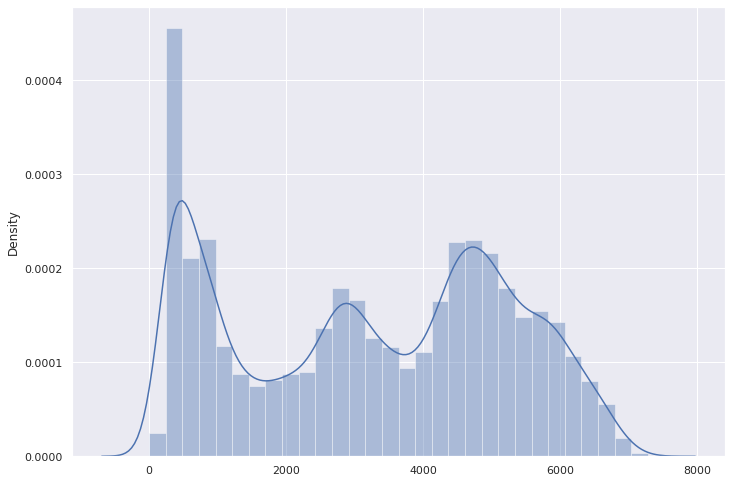

In [199]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

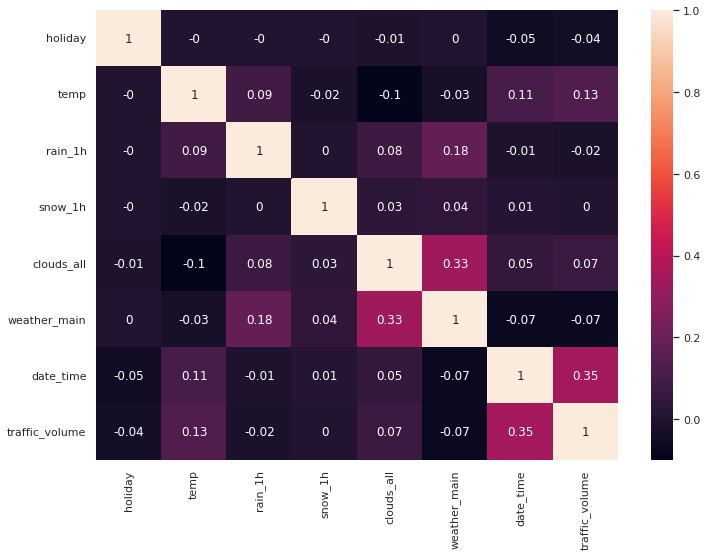

In [202]:
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
"""X= dataset[["age", "sex","bmi","smoker","region"]]"""

'X= dataset[["age", "sex","bmi","smoker","region"]]'

**Splitting the dataset into training and test sets**

In [203]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[2119.35  593.  ]
 [3105.58 5654.  ]
 [3031.19 4236.  ]
 ...
 [2325.68 1378.  ]
 [4605.07 2030.  ]
 [3727.07 5924.  ]]


In [205]:
y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print(rmse)
print(r2)

1840.3096440336692
0.1414116379975623


In [206]:
import sklearn.metrics
import math
y_test_predict=regressor.predict(X_test)
mse = sklearn.metrics.mean_squared_error(Y_test, y_test_predict)

rmse = math.sqrt(mse)
#rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2t = r2_score(Y_test, y_test_predict)
print(rmse)
print(r2t)

1846.5852206556028
0.1384512526121514
